In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('customer.csv')
data.head()

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [37]:
data.drop(columns=['code_column','Unnamed: 0'], inplace=True)
data.head()

,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,gas_usage,rooms,recent_move_b
0,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,210.0,3,F
1,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,3.0,6,T
2,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,40.0,3,F
3,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,120.0,2,F
4,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,3.0,2,F


In [38]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])
categorical_features = data.select_dtypes(include=['object', 'category', 'bool'])


for feature in numerical_features:
    reshaped_f = data[feature].values.reshape(-1, 1)
    scaler = StandardScaler().fit(reshaped_f)
    data[f"standardized_{feature}"] = scaler.transform(reshaped_f)

enc=LabelEncoder()

for feature in categorical_features:
    data[f"{feature}_num"]=enc.fit_transform(data[feature])

final_columns = [f"standardized_{feature}" for feature in numerical_features.columns] + [f"{feature}_num" for feature in categorical_features.columns]

newdf = data[final_columns]

newdf.head()

,standardized_income,standardized_num_vehicles,standardized_age,standardized_gas_usage,standardized_rooms,custid_num,sex_num,is_employed_num,marital_status_num,health_ins_num,housing_type_num,state_of_res_num,recent_move_b_num
0,-0.341170,-1.766411,-1.393533,2.672565,-0.289798,314,1,1,2,1,0,0,0
1,-0.320578,-1.766411,1.812674,-0.605403,1.468159,375,0,2,0,1,3,0,1
2,-0.358331,-0.057108,-1.006577,-0.019486,-0.289798,402,0,1,2,1,1,0,0
3,-0.070553,-0.911759,2.420748,1.247362,-0.875784,409,0,2,3,1,0,0,0
4,-0.049446,-0.057108,0.983482,-0.605403,-0.875784,418,1,1,0,1,3,0,0


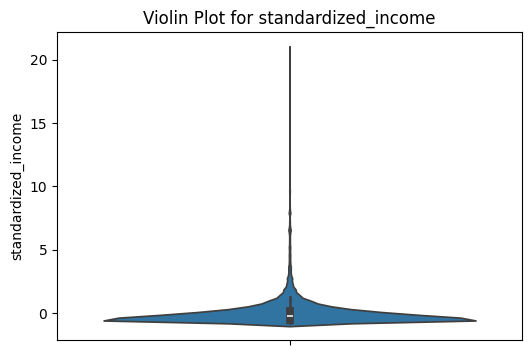

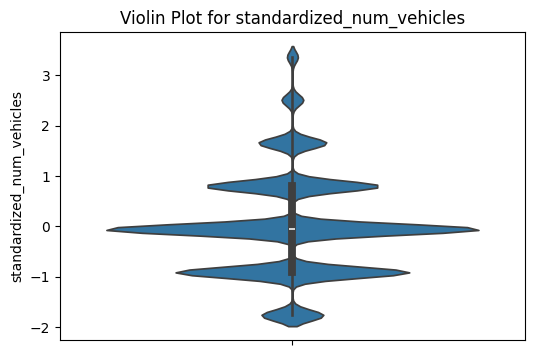

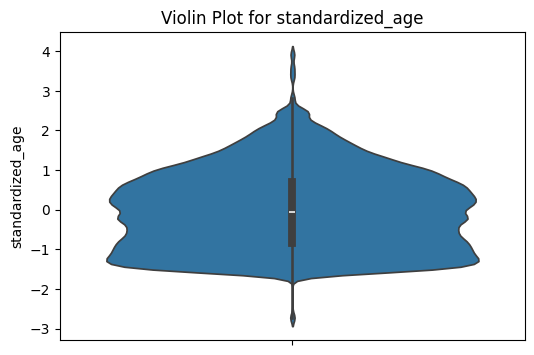

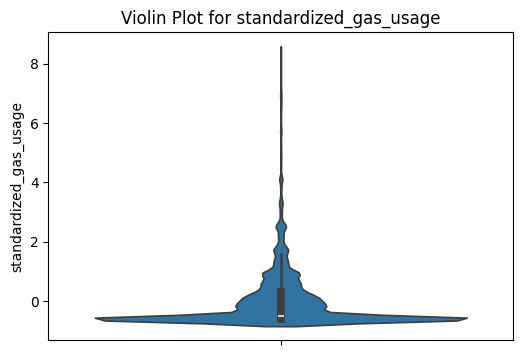

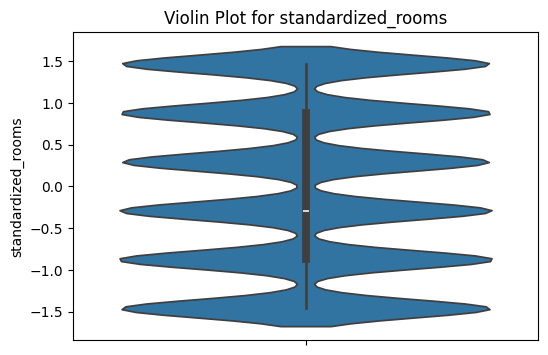

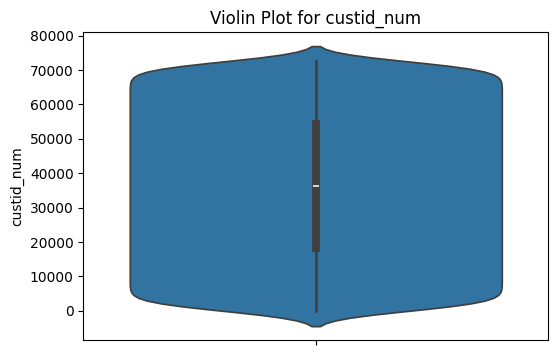

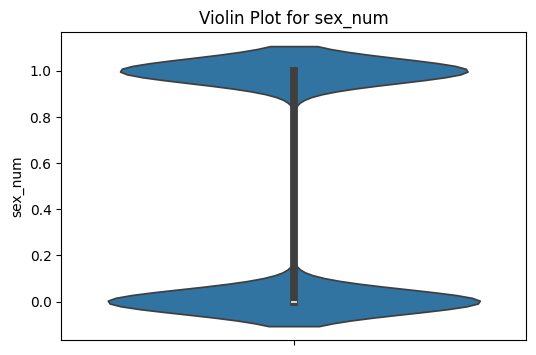

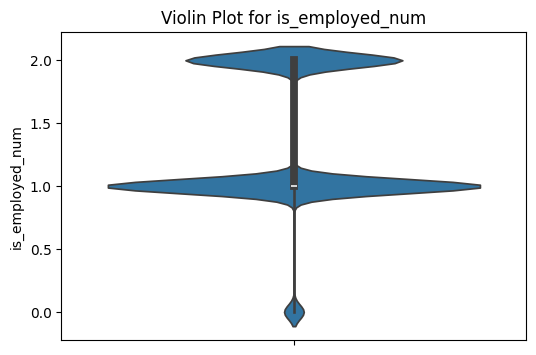

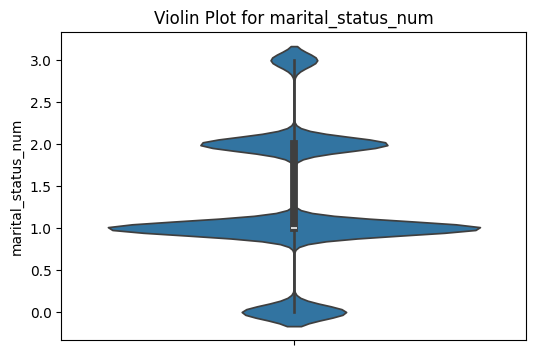

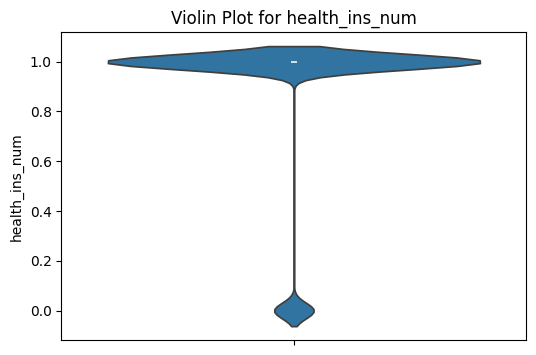

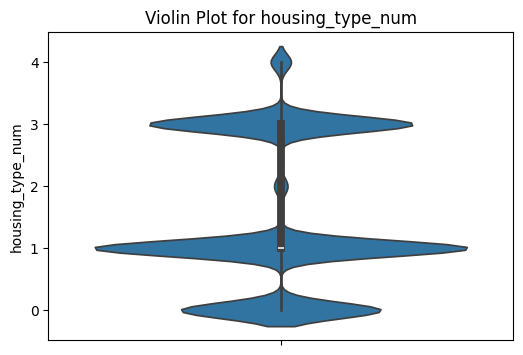

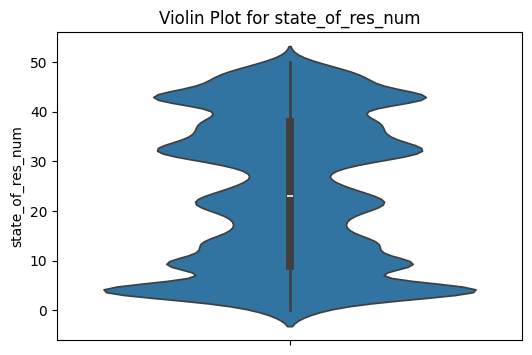

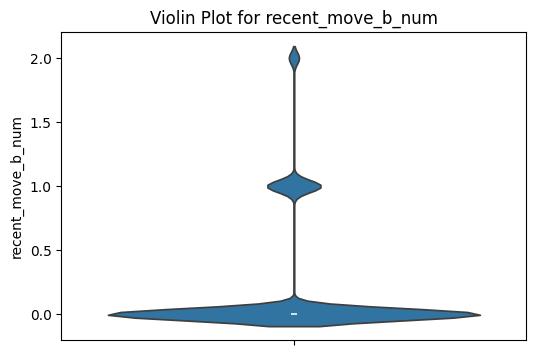

In [41]:
for col in newdf.select_dtypes(include=['int64', 'float64']).columns:
    fig, ax = plt.subplots(figsize=(6, 4))
    sb.violinplot(data=newdf[col], ax=ax)
    ax.set_title(f"Violin Plot for {col}")
    plt.show()